# Importing Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler

# Importing the dataset

In [2]:
df = pd.read_csv('roo_data.csv')

In [3]:
df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [4]:
df.shape

(20000, 39)

# No missing values

In [5]:
df.isnull().sum().sum()

0

# Feature Analysis

In [6]:
def plot_y_counts():
  counts = df["Suggested Job Role"].value_counts()
  plt.xlabel("Suggested Job Role")
  plt.ylabel("Counts")
  plt.title("Class Counts")
  sns.barplot(x=counts.index,y=counts.values)
  plt.xticks(rotation='vertical')
  plt.show()

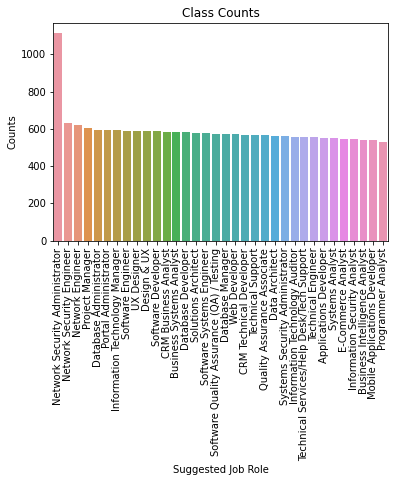

In [7]:
plot_y_counts()

In [8]:
categorical_cols = [col for col in df.columns if df[col].dtype=="O"]
numerical_cols = list(set(df.columns)-set(categorical_cols))

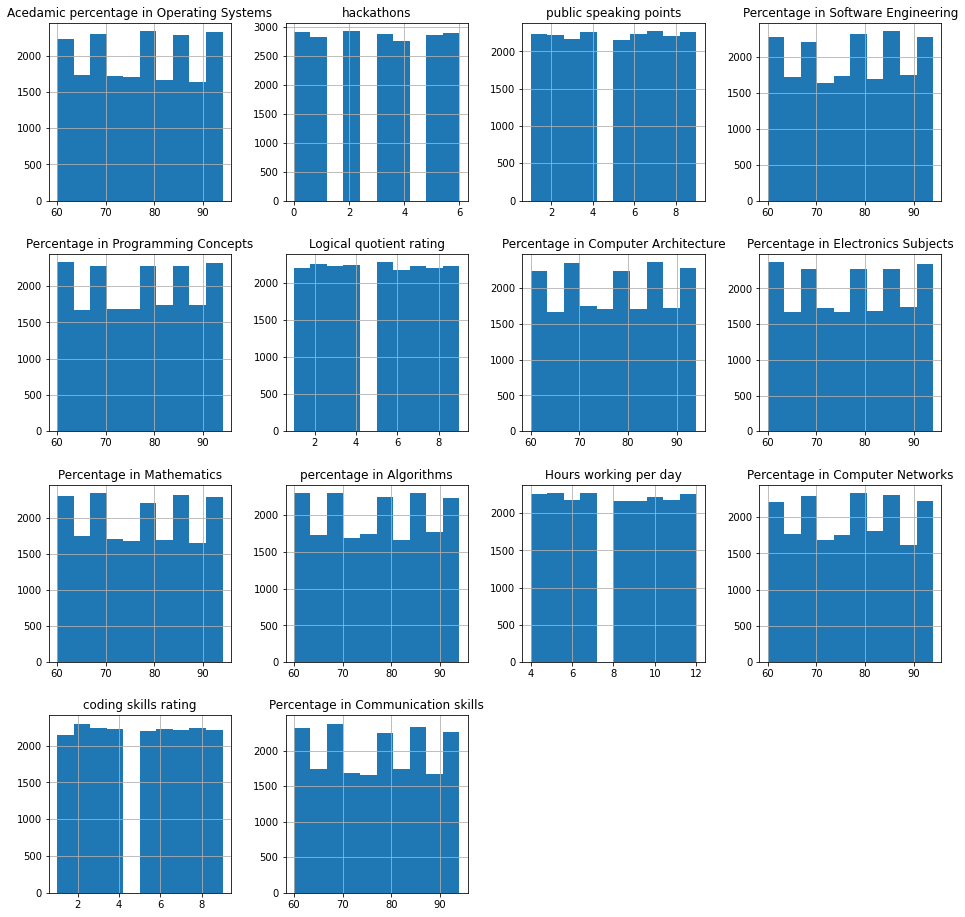

In [9]:
df[numerical_cols].hist(figsize=(16,16),bins=10)
plt.show()

# Correlation Heatmap

[]

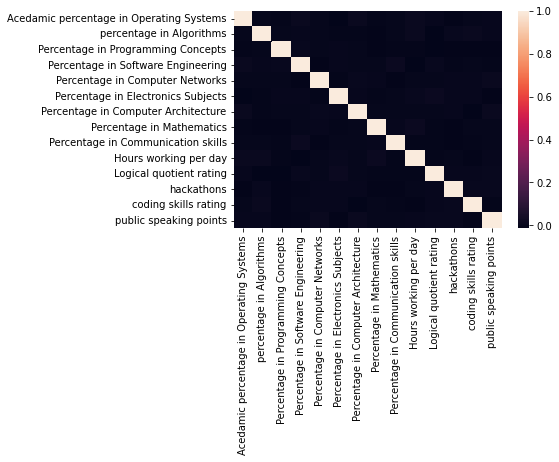

In [10]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
plt.plot()

# Merging Classes in output to reduce the number of classes

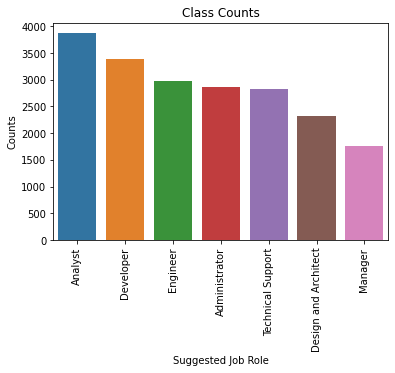

In [11]:
classes = df['Suggested Job Role'].unique()
classes.sort()

classes_merged = dict()
classes_merged['Analyst'] = []
classes_merged['Administrator'] = []
classes_merged['Design and Architect'] = []
classes_merged['Developer'] = []
classes_merged['Engineer'] = []
classes_merged['Technical Support'] = []
classes_merged["Manager"] = []

for class_ in classes:
  if "Analyst" in class_:
    classes_merged["Analyst"].append(class_)
  elif "Administrator" in class_:
    classes_merged["Administrator"].append(class_)
  elif "Developer" in class_:
    classes_merged["Developer"].append(class_)
  elif "Engineer" in class_:
    classes_merged["Engineer"].append(class_)
  elif "Design" in class_ or "Architect" in class_:
    classes_merged["Design and Architect"].append(class_)
  elif "Manager" in class_:
    classes_merged["Manager"].append(class_)
  else:
    classes_merged["Technical Support"].append(class_)

for i in classes_merged:
  df['Suggested Job Role'].replace(classes_merged[i],i,inplace=True)

plot_y_counts()

# Connecting this data with electives advisory system from Assignment 1

In [12]:
mapping_interests = {'networks':'computer networks',
           'hacking':'foundations of computer security',
           'programming':'introduction to programming'}

for i in mapping_interests:
  df['Interested subjects'].replace(i,mapping_interests[i],inplace=True)

In [13]:
mapping_certifications = {'shell programming':'operating systems',
                          'machine learning': 'data science',
                          'app development': 'mobile app development',
                          'r programming': 'R',
                          'full stack': 'full stack development'}

for i in mapping_certifications:
  df['certifications'].replace(i,mapping_certifications[i],inplace=True)

# Feature scaling using Standard Scaler and Encoding Categorical Columns

In [14]:
standardScaler = StandardScaler()
df[numerical_cols] = standardScaler.fit_transform(df[numerical_cols])
output_mapping = dict()

for col in categorical_cols:
  labelEncoder = LabelEncoder()
  df[col] = labelEncoder.fit_transform(df[col])
  if col=='Suggested Job Role':
    output_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))

# Splitting into X and y

In [15]:
y = df['Suggested Job Role']
X = df.drop(columns=['Suggested Job Role'])

# Applying PCA

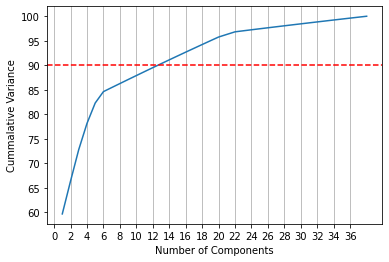

In [16]:
pca = PCA(n_components = 38, random_state=0)
df_pca = pca.fit_transform(X)

fig, ax = plt.subplots()
xpca = np.arange(pca.n_components_) + 1
ypca = np.cumsum(pca.explained_variance_ratio_)*100
plt.plot(xpca,ypca)
plt.axhline(y=90, color='r', linestyle='--')
plt.xticks(np.arange(0, 38, step=2))
plt.xlabel("Number of Components")
plt.ylabel("Cummalative Variance")
ax.grid(axis='x')
plt.show()

13 components are chosen

In [17]:
pca = PCA(n_components=13,random_state=0)
X_pca = pca.fit_transform(X)

# Functions for computing the metrics and training the model

In [18]:
def show_metrics(y_true,y_pred,size):
  print("Accuracy Score",accuracy_score(y_true, y_pred))
  cm = confusion_matrix(y_true, y_pred)
  print("Class-wise Accuracies",cm.diagonal()/cm.sum(axis=1))
  print("Confusion Matrix\n")
  plt.figure(figsize = (6,6))
  sns.heatmap(cm, annot=True,xticklabels=output_mapping.keys(),yticklabels=output_mapping.keys())
  plt.show()

In [19]:
def train_ann(X,y = y,size=16,activation='tanh',layer_sizes=(100,),alpha=0.0001,test_size=0.3):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
  mlp = MLPClassifier(random_state=1,max_iter=250, hidden_layer_sizes=layer_sizes,learning_rate_init=0.01,activation=activation,alpha=alpha)
  mlp.fit(X_train,y_train)
  y_pred = mlp.predict(X_test)
  show_metrics(y_test,y_pred,size)
  return mlp

Accuracy Score 0.153
Class-wise Accuracies [0.1536643  0.25269784 0.08184524 0.13165829 0.10606061 0.07720588
 0.19955899]
Confusion Matrix



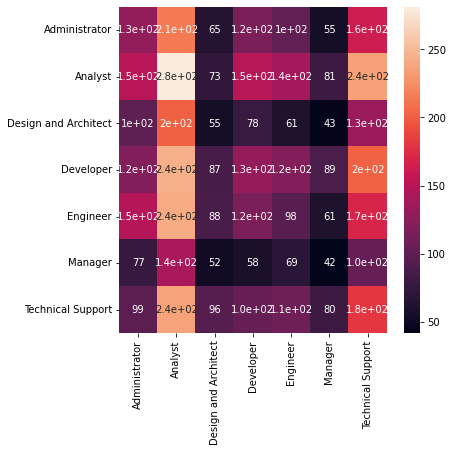

MLPClassifier(activation='tanh', learning_rate_init=0.01, max_iter=250,
              random_state=1)

In [20]:
train_ann(X)

Accuracy Score 0.15566666666666668
Class-wise Accuracies [0.13947991 0.29586331 0.08333333 0.18190955 0.13095238 0.02389706
 0.12789416]
Confusion Matrix



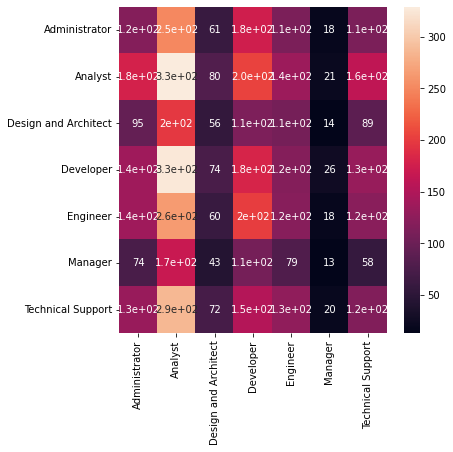

MLPClassifier(activation='tanh', learning_rate_init=0.01, max_iter=250,
              random_state=1)

In [21]:
train_ann(X_pca)

# Trying Different Activation Functions

Accuracy Score 0.18533333333333332
Class-wise Accuracies [0. 1. 0. 0. 0. 0. 0.]
Confusion Matrix



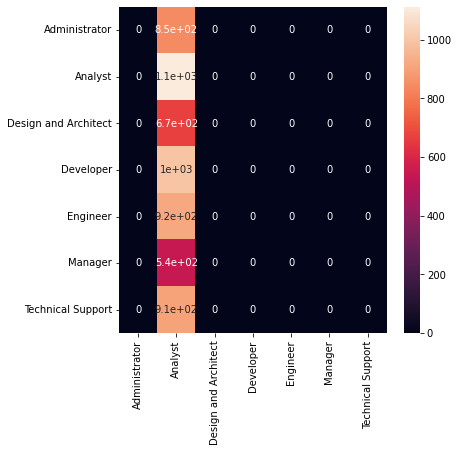

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy Score 0.157
Class-wise Accuracies [0.11465721 0.33093525 0.07886905 0.17688442 0.13744589 0.04595588
 0.10584344]
Confusion Matrix



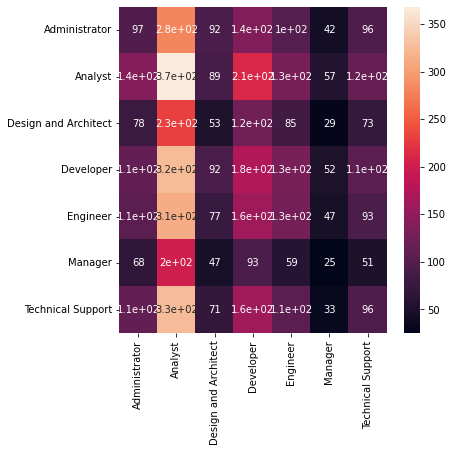

Accuracy Score 0.153
Class-wise Accuracies [0.1536643  0.25269784 0.08184524 0.13165829 0.10606061 0.07720588
 0.19955899]
Confusion Matrix



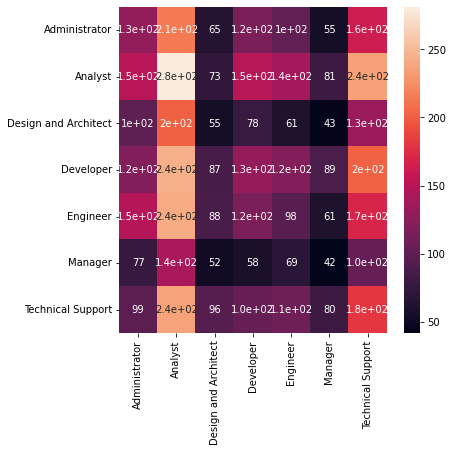

Accuracy Score 0.17516666666666666
Class-wise Accuracies [0.10992908 0.48471223 0.04166667 0.18291457 0.11147186 0.02757353
 0.10033076]
Confusion Matrix



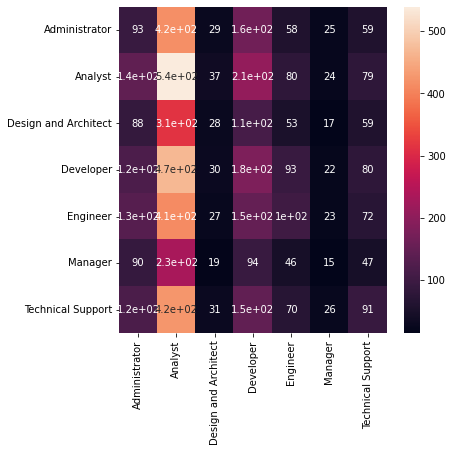

In [22]:
activation_functions = ['identity','logistic','tanh','relu']
for activation in activation_functions:
  train_ann(X,activation=activation)


# Trying Different Hidden Layer Sizes

Accuracy Score 0.153
Class-wise Accuracies [0.1536643  0.25269784 0.08184524 0.13165829 0.10606061 0.07720588
 0.19955899]
Confusion Matrix



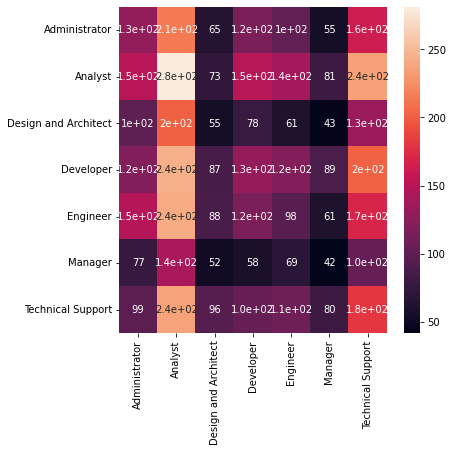

Accuracy Score 0.14383333333333334
Class-wise Accuracies [0.11820331 0.1807554  0.04464286 0.13869347 0.24458874 0.13235294
 0.10584344]
Confusion Matrix



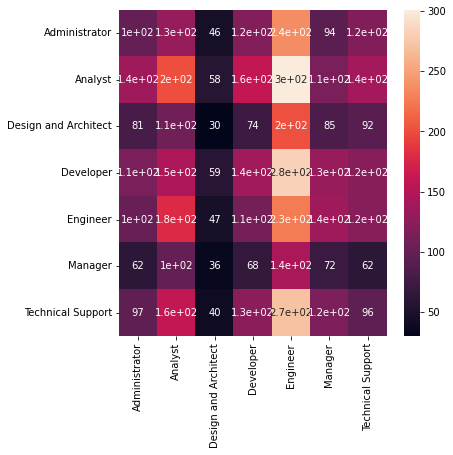

Accuracy Score 0.17133333333333334
Class-wise Accuracies [0.06264775 0.74280576 0.0297619  0.07738693 0.02272727 0.04044118
 0.00992282]
Confusion Matrix



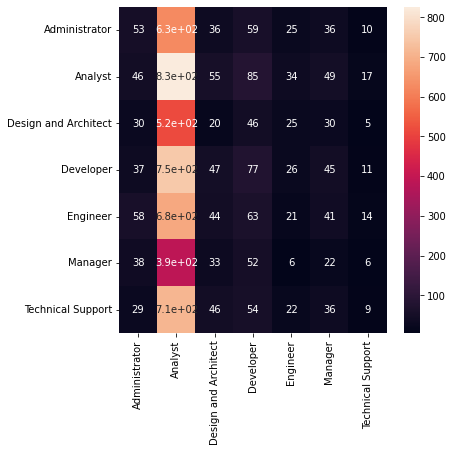

In [23]:
sizes =[(100,),(100,50),(100,50,20)]
for size in sizes:
  train_ann(X,layer_sizes=size)

# Trying Different Alpha Values

Accuracy Score 0.153
Class-wise Accuracies [0.1536643  0.25269784 0.08184524 0.13165829 0.10606061 0.07720588
 0.19955899]
Confusion Matrix



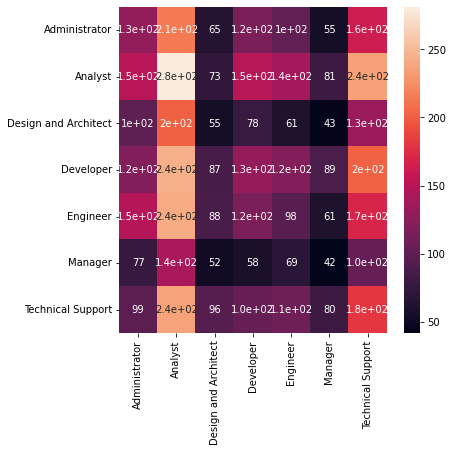

Accuracy Score 0.15533333333333332
Class-wise Accuracies [0.10874704 0.10161871 0.02083333 0.19095477 0.40151515 0.02573529
 0.15214994]
Confusion Matrix



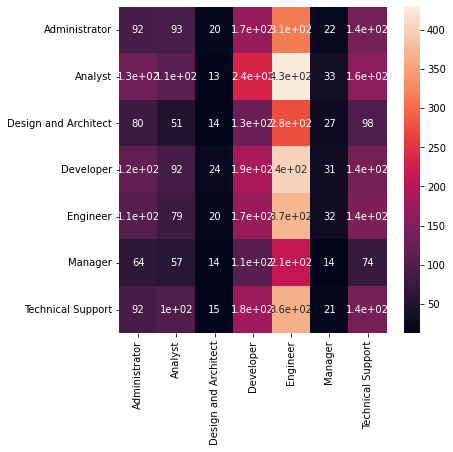

In [24]:
alphas =  [0.0001, 0.05]
for alpha in alphas:
  train_ann(X,alpha=alpha)

# Best Hyperparameters

Accuracy Score 0.15833333333333333
Class-wise Accuracies [0.11702128 0.50269784 0.08630952 0.06633166 0.05735931 0.06066176
 0.09040794]
Confusion Matrix



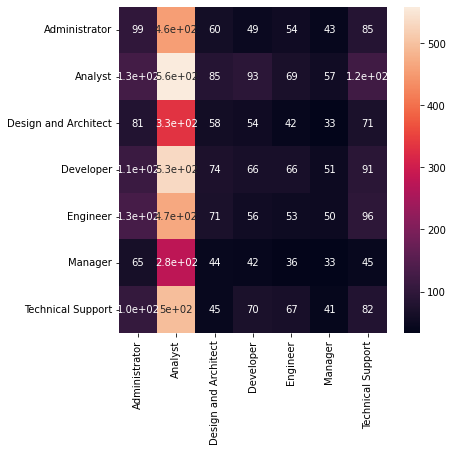

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(100, 50),
              learning_rate_init=0.01, max_iter=250, random_state=1)

In [25]:
train_ann(X,alpha=0.05,layer_sizes=(100,50),activation='tanh')

# Trying Different Ratios of Train-test-split

Accuracy Score 0.191
Class-wise Accuracies [0.         0.96858639 0.         0.         0.04444444 0.
 0.        ]
Confusion Matrix



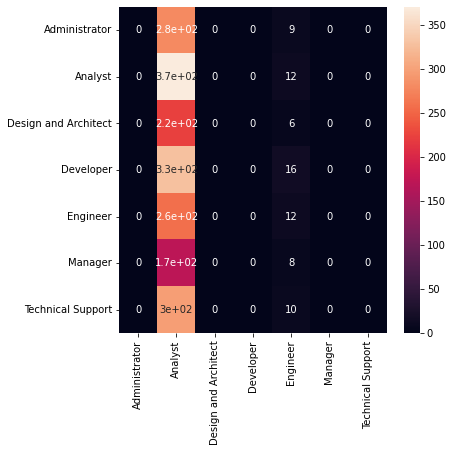

Accuracy Score 0.17325
Class-wise Accuracies [0.29432624 0.6966443  0.         0.01210287 0.         0.
 0.        ]
Confusion Matrix



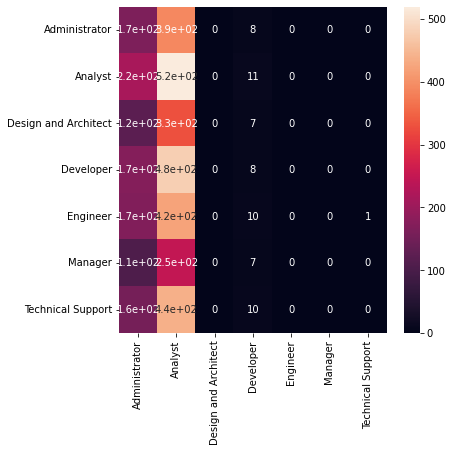

Accuracy Score 0.15833333333333333
Class-wise Accuracies [0.11702128 0.50269784 0.08630952 0.06633166 0.05735931 0.06066176
 0.09040794]
Confusion Matrix



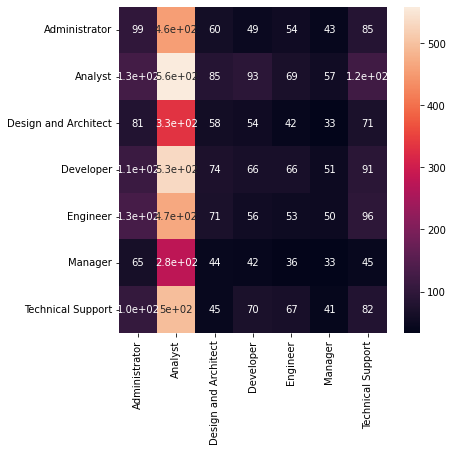

Accuracy Score 0.145875
Class-wise Accuracies [0.14324082 0.34383378 0.0494382  0.11069559 0.10522088 0.05986395
 0.10726351]
Confusion Matrix



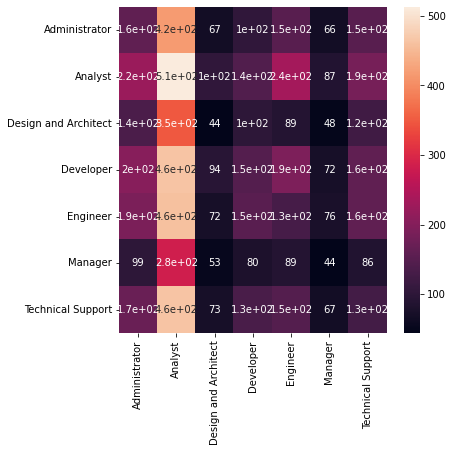

In [26]:
test_sizes = [0.1,0.2,0.3,0.4]

for size in test_sizes:
  train_ann(X,alpha=0.05,layer_sizes=(100,50),activation='tanh',test_size=size)

# Random OverSampler to over sample the minority classes

In [27]:
ros = RandomOverSampler(random_state=42)
X_, y1 = ros.fit_resample(X,y)
X1 = pd.DataFrame(X_,columns=X.columns)

Accuracy Score 0.2885939036381514
Class-wise Accuracies [0.31869078 0.05017007 0.47288889 0.16209262 0.18782609 0.53517588
 0.29467354]
Confusion Matrix



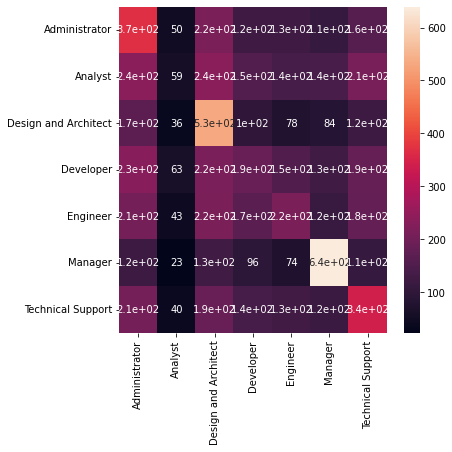

In [28]:
final_model = train_ann(X1,y=y1,alpha=0.05,layer_sizes=(100,50),activation='tanh')